In [12]:
import numpy as np
import math as mt 
import matplotlib.pyplot as plt
import scipy as sci
import scipy.special 
from matplotlib.animation import FuncAnimation
import tqdm as tqdm
from matplotlib.colors import LinearSegmentedColormap
import time as time
from matplotlib import rc
colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

cm1 = LinearSegmentedColormap.from_list(
        "Custom", [(1,0,0),(0,0,0)], N=20)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 25})
rc('text', usetex=True)

Se definen las características del holograma que se va a proyectar en el SLM, aquí se tiene que tener en cuenta el número de pixeles del SLM. En nuestro caso, el Cambridge Correllators tiene una grilla de $1024\times768$ píxeles.

In [13]:
#Número de píxeles del SLM tanto vertical como horizontal
Nxpix = 1024
Nypix = 768

#Grating (que no tengo idea de qué putas es)

#Jeje, ahora sí sé qué putas es.

k = 100

w = 455/9

Se define la grilla de la imagen que contendrá el holograma. 

In [14]:
"""Creo que esto es una normalización de la grilla sobre
con la dimensión más pequeña que se tenga."""

x = Nxpix/np.min([Nypix,Nxpix])
y = Nypix/np.min([Nypix,Nxpix])

d1 = np.linspace(-x,x,Nxpix)
d2 = np.linspace(-y,y,Nypix)

XX,YY = np.meshgrid(d1,d2)



Se creará la función que dé el campo eléctrico que se desea obtener luego de que el haz gaußiano pase por el SLM. Este debe tener la forma $$ E_{\text{out}}(\mathbf{r}) = \sqrt{\frac{2p!}{\pi(p +|\ell|)!}} \left(\frac{\sqrt{2}r}{w_0} \right)^{|\ell|}L_{p}^{|\ell|}\left( \frac{2r^2}{w_0^2}\right)\exp\left(-\frac{r^2}{w_0^2} \right) \exp\left( i\ell \theta\right)$$

In [15]:
def LG(p,ell,r):
    return sci.special.assoc_laguerre(r,ell,p)

In [16]:
def ElectrischenFeld(p,ell,w,xx,yy,theta=0,total_z_prop=True):
    if not total_z_prop:
        prop = np.exp(1j*k*np.sin(theta)*XX)
    else:
        prop = 1
    rr = np.sqrt(xx**2 + yy**2)
    A = np.sqrt(2/(np.pi*mt.factorial(np.abs(ell))))
    B = (np.sqrt(2)*rr/w)**np.abs(ell)
    C = np.exp(-rr**2/w**2)
    Phase = np.exp(1j*ell*(np.arctan2(yy,xx))) 
    ElectricFeld = A*B*C*LG(2*rr**2/w**2,np.abs(ell),p)*Phase*prop
    return ElectricFeld

In [17]:
gray="gray"
rb = "rainbow"
theta = 45
theta = np.pi*theta/180
E1 = ElectrischenFeld(0,1,w,XX,YY)
E2 = ElectrischenFeld(0,0,w,XX,YY,theta,False)

H = np.real((E2+E1)*np.conjugate(E2 + E1))

pattern = plt.contourf(XX,YY,H,100,cmap="gray")
plt.axis(False)
plt.savefig("diff_grating_interference.png")

AttributeError: module 'scipy' has no attribute 'special'

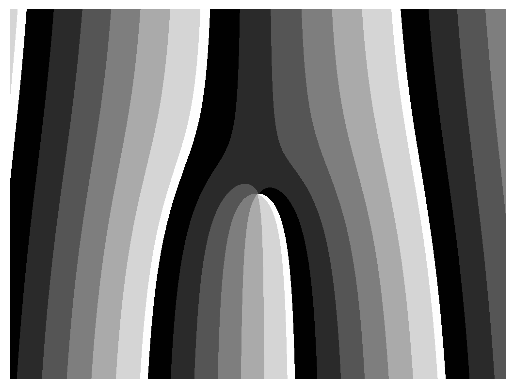

In [50]:
gray="gray"
rb = "rainbow"
theta = 45
theta = np.pi*theta/180
E1 = ElectrischenFeld(0,1,w,XX,YY)
E2 = ElectrischenFeld(0,0,w,XX,YY,theta,False)

H = np.uint8((np.angle(E2) + np.angle(E1))%(2*np.pi))

pattern = plt.contourf(XX,YY,H,100,cmap="gray")
plt.axis(False)
plt.savefig("diff_grating_phase_adding.png")

# Manera en como lo hace Daniel Urrego en su tesis de doctorado